In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2024-07-30 09:42:52.200775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 09:42:52.201028: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 09:42:52.391483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [4]:
df = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')

In [5]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X = df.drop('0',axis = 1) # axis=1 for dropping column
y = df['0']

In [7]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float32

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28)) #0=> B&W, 28x28 matrix

print("Train data shape: ", X_test.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (74490, 28, 28)
Test data shape:  (74490, 28, 28)


In [10]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

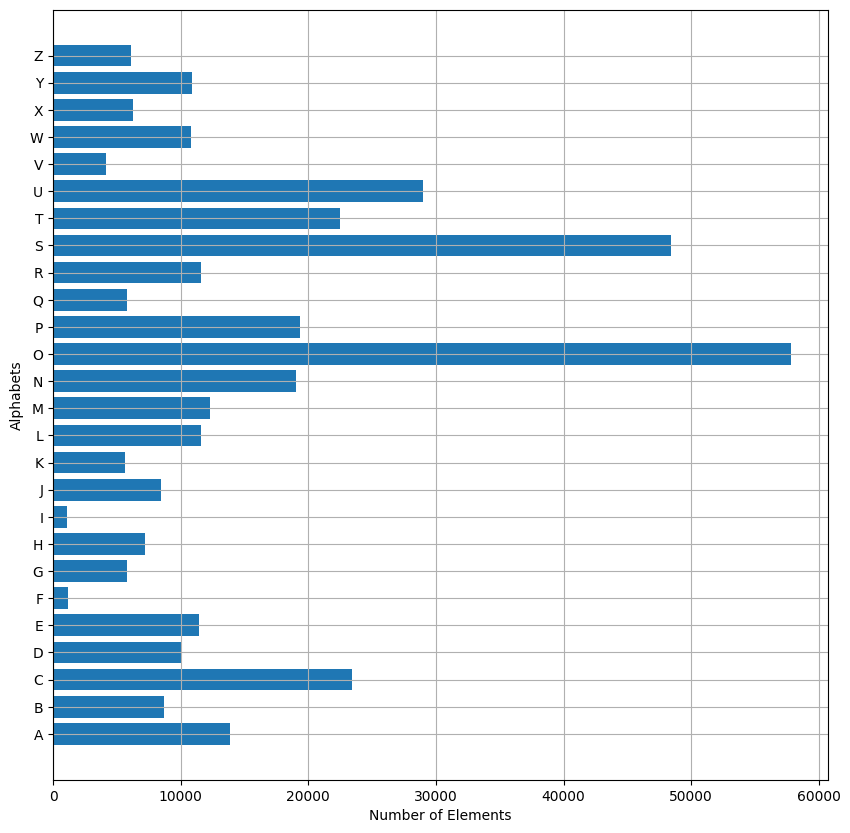

In [12]:
# Convert the list of labels to integer type
y_int = np.int0(y)

# Initialize a count array with zeros, where each position corresponds to a letter in the alphabet
count = np.zeros(26, dtype='int')

# Count occurrences of each letter
for i in y_int:
    count[i] += 1

# Extract the list of alphabet labels from the word dictionary
alphabets = [value for value in word_dict.values()]

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(alphabets, count)

# Label the axes and show grid lines
plt.xlabel("Number of Elements")
plt.ylabel("Alphabets")
plt.grid(True)

# Display the plot
plt.show()

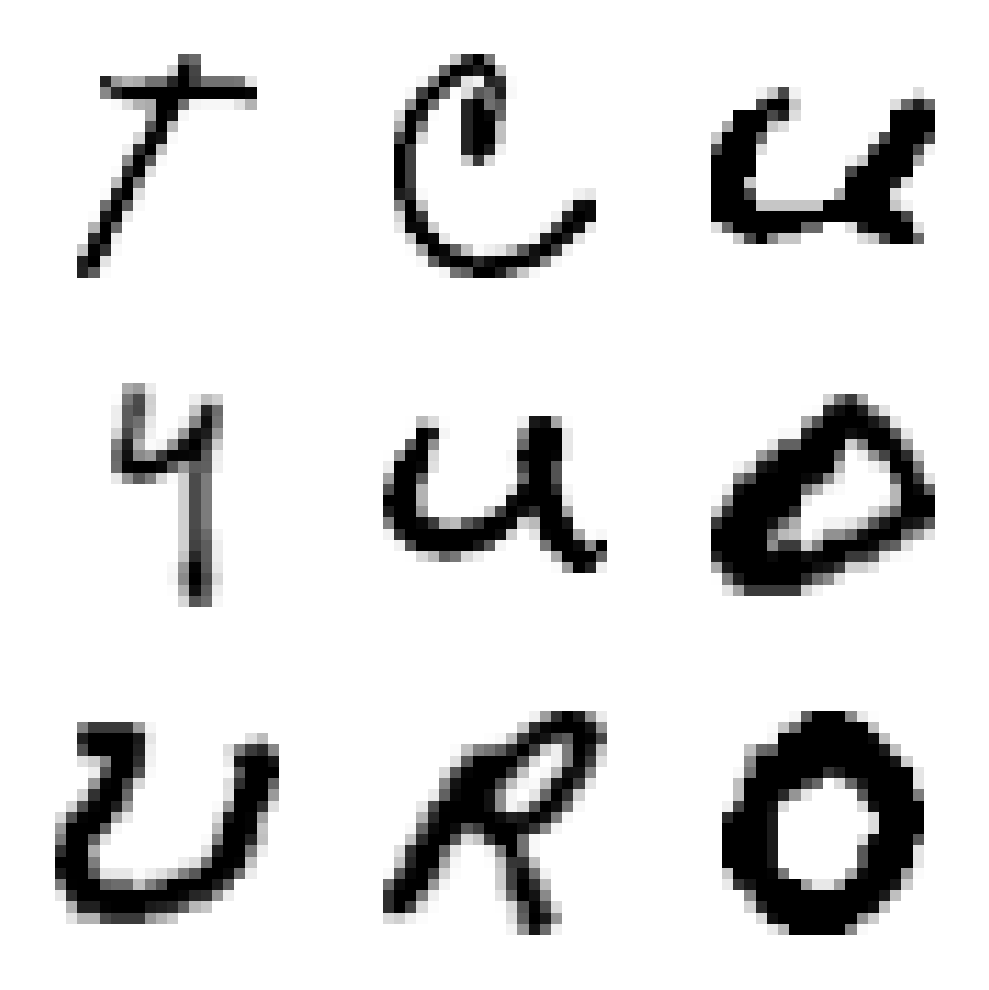

In [13]:
# Shuffle the first 100 samples from the training set
shuffled_samples = shuffle(X_train[:100])

# Create a 3x3 grid of subplots with a figure size of 10x10 inches
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the 3x3 grid of axes for easy iteration
axes = axes.flatten()

# Iterate through the first 9 shuffled samples
for i in range(9):
    # Apply a binary threshold to each image with a threshold value of 30
    _, binary_image = cv2.threshold(shuffled_samples[i], 30, 200, cv2.THRESH_BINARY)
    
    # Reshape the image to 28x28 and display it in the corresponding subplot
    axes[i].imshow(np.reshape(shuffled_samples[i], (28, 28)), cmap="Greys")
    axes[i].axis('off')  # Hide the axis ticks for clarity

# Adjust layout to prevent overlap and show the plot
plt.tight_layout()
plt.show()

In [14]:
# Reshape the training data to include a single channel dimension
# This converts the data from an RGB format (or a 3D array) to a format with a single channel
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print("New shape of training data:", X_train.shape)

# Reshape the test data similarly to include a single channel dimension
# This ensures consistency in data format between training and test datasets
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("New shape of test data:", X_test.shape)

New shape of training data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [15]:
# Convert training labels to one-hot encoded format
train_yOHE = to_categorical(Y_train, num_classes=26)
print("New shape of training labels:", train_yOHE.shape)

# Convert test labels to one-hot encoded format
test_yOHE = to_categorical(Y_test, num_classes=26)
print("New shape of test labels:", test_yOHE.shape)

New shape of training labels: (297960, 26)
New shape of test labels: (74490, 26)


In [16]:
# Initialize the Sequential model
model = Sequential()

# Add the first convolutional layer
# Applies 32 filters of size 3x3, uses ReLU activation, and expects input of shape (28, 28, 1)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add the first max pooling layer
# Reduces the spatial dimensions using a 2x2 pool size and a stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Add the second convolutional layer
# Applies 64 filters of size 3x3, uses ReLU activation, with padding set to 'same' to keep the output size the same as the input
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

# Add the second max pooling layer
# Reduces the spatial dimensions again with a 2x2 pool size and a stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Add the third convolutional layer
# Applies 128 filters of size 3x3, uses ReLU activation, with padding set to 'valid' (no padding)
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))

# Add the third max pooling layer
# Further reduces the spatial dimensions with a 2x2 pool size and a stride of 2
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Flatten the output from the convolutional and pooling layers into a 1D vector
model.add(Flatten())

# Add a fully connected (dense) layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add another fully connected (dense) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 26 units (one for each class) and softmax activation for multi-class classification
model.add(Dense(26, activation='softmax'))

In [17]:
# Compile the model
# - Adam optimizer with a learning rate of 0.001
# - Loss function set to categorical cross-entropy for multi-class classification
# - Track accuracy as a performance metric
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
# - Fit the model on the training data for 1 epoch
# - Use validation data (test set) to evaluate performance after each epoch
history = model.fit(X_train, 
                    train_yOHE, 
                    epochs=1, 
                    validation_data=(X_test, test_yOHE))

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 220s 23ms/step - accuracy: 0.9097 - loss: 0.3996 - val_accuracy: 0.9747 - val_loss: 0.0903


In [18]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

In [19]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9747348427772522]
The training accuracy is : [0.955990731716156]
The validation loss is : [0.09028953313827515]
The training loss is : [0.1641407608985901]


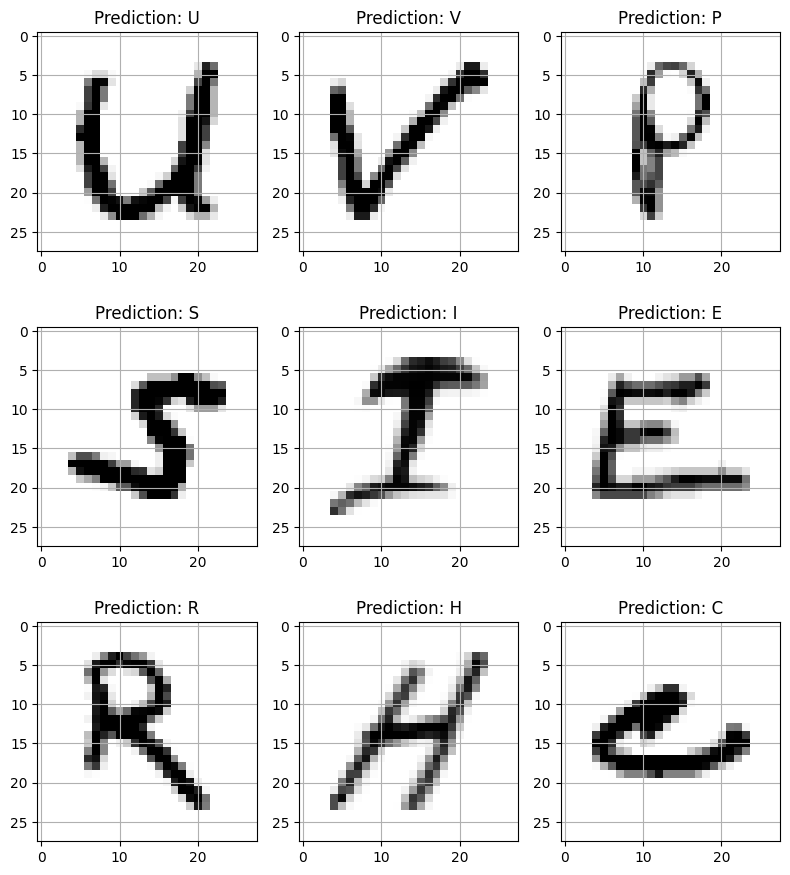

In [20]:
# Create a 3x3 grid of subplots with a figure size of 8x9 inches
fig, axes = plt.subplots(3, 3, figsize=(8, 9))

# Flatten the 2D array of axes to a 1D array for easy iteration
axes = axes.flatten()

# Iterate over the axes and their corresponding index
for i, ax in enumerate(axes):
    # Reshape the i-th test image to 28x28 for visualization
    img = np.reshape(X_test[i], (28, 28))
    
    # Display the image in grayscale
    ax.imshow(img, cmap="Greys")
    
    # Get the predicted class label from the one-hot encoded test labels
    pred = word_dict[np.argmax(test_yOHE[i])]
    
    # Set the title of the subplot to the predicted class label
    ax.set_title(f"Prediction: {pred}")
    
    # Add a grid to the subplot for better visibility
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


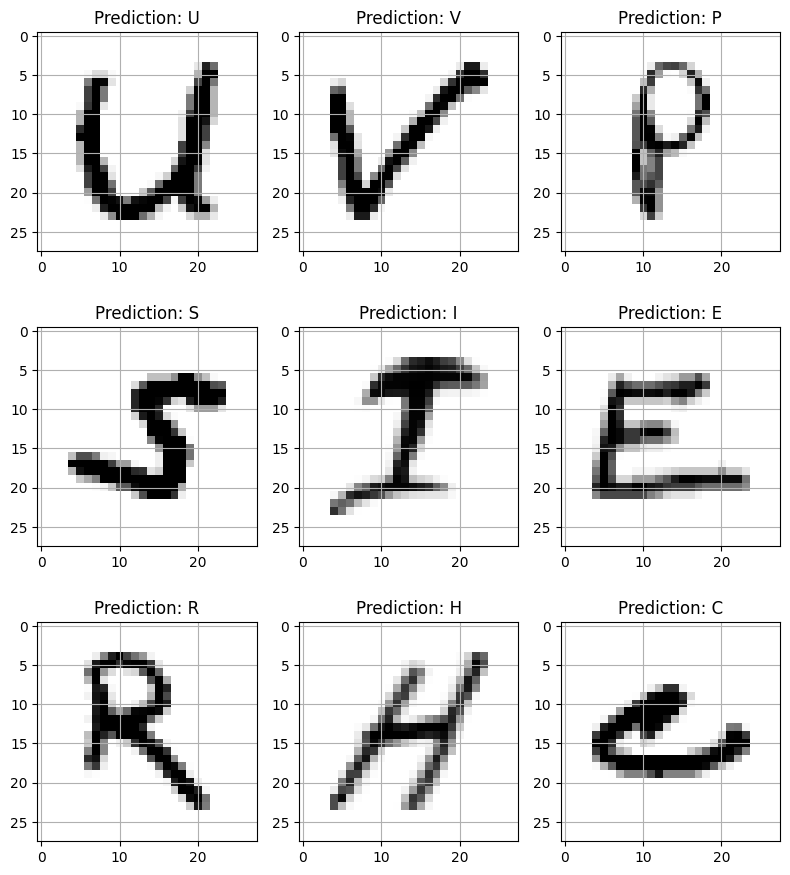

In [21]:
# Create a 3x3 grid of subplots with a figure size of 8x9 inches
fig, axes = plt.subplots(3, 3, figsize=(8, 9))

# Flatten the 2D array of axes to a 1D array for easy iteration
axes = axes.flatten()

# Iterate over the subplots and their indices
for i, ax in enumerate(axes):
    # Reshape the i-th test image to 28x28 for visualization
    img = np.reshape(X_test[i], (28, 28))
    
    # Display the image in grayscale
    ax.imshow(img, cmap="Greys")
    
    # Reshape the image to (1, 28, 28, 1) for model prediction
    img_final = np.reshape(img, (1, 28, 28, 1))
    
    # Predict the class of the image using the model
    pred = model.predict(img_final)
    
    # Get the predicted class label
    pred_label = word_dict[np.argmax(pred)]
    
    # Set the title of the subplot to the predicted class label
    ax.set_title(f"Prediction: {pred_label}")
    
    # Add a grid to the subplot for better visibility
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()